**Reference**: 
- [MarinStatsLectures: Introduction to Permutation Test](https://www.youtube.com/watch?v=rJ3AZCQuiLw)
- [MarinStatsLectures: Permutation Test in R](https://www.youtube.com/watch?v=xRzEWLfEEIA)
- [R handbook: Introduction to permutation test](https://rcompanion.org/handbook/K_01.html)
- [An introduction to Permutation Test Lioyd Rieber](https://www.youtube.com/watch?v=GmvpsJHGCxQ)


# 1. Why?

- The sample size is small
- Test something rather than classic approach like mean (T-test, ANOVA) or median (Wilcoxon-Rank Sum Test). For example, The difference of the median of 2 groups.
- Difficult to work out the **Standard Error** of the test-statistic
- It does not rely on assumptions about the distribution of the data, as some other tests do.  They are therefore considered to be nonparametric tests. 


# 2. Drawback
- Cannot build **confidence interval**, only used for **hypothesis testing**

# 3. From scratch

In [3]:
library(tidyverse)

In [10]:
Input = ("
 Individual  Hand     Length
 A           Left     17.5
 B           Left     18.4
 C           Left     16.2
 D           Left     14.5
 E           Left     13.5
 F           Left     18.9
 G           Left     19.5
 H           Left     21.1
 I           Left     17.8
 J           Left     16.8
 K           Left     18.4
 L           Left     17.3
 M           Left     18.9
 N           Left     16.4
 O           Left     17.5
 P           Left     15.0
 A           Right    17.6
 B           Right    18.5
 C           Right    15.9
 D           Right    14.9
 E           Right    13.7
 F           Right    18.9
 G           Right    19.5
 H           Right    21.5
 I           Right    18.5
 J           Right    17.1
 K           Right    18.9
 L           Right    17.5
 M           Right    19.5
 N           Right    16.5
 O           Right    17.4
 P           Right    15.6
")

hand = read_table(Input, col_types = 'ffd')
head(hand)

Individual,Hand,Length
<fct>,<fct>,<dbl>
A,Left,17.5
B,Left,18.4
C,Left,16.2
D,Left,14.5
E,Left,13.5
F,Left,18.9


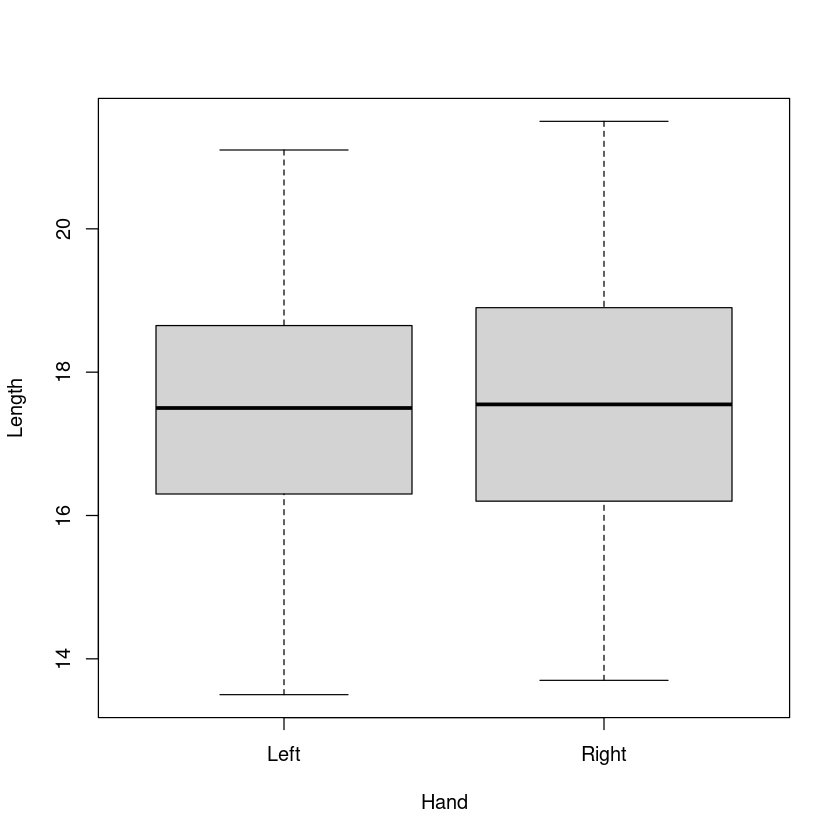

In [6]:
boxplot(Length ~ Hand, data = hand)

let's say our test statistic is the difference between the median length of right hand minus the median length of left hand

Hypothesis:
- H0: The median length of right hand is the same as the median length of left hand
- H1: different

In [9]:
# sample size
sample_size <- nrow(hand)
sample_size

[1] 32

In [7]:
# calculate test statistic
test_statistic <- with(hand, median(Length[Hand == 'Right']) - median(Length[Hand == 'Left']))
test_statistic

[1] 0.05

In [8]:
# the size of each group
group_size <- table(hand$Hand)
group_size


 Left Right 
   16    16 

In [12]:
# run permutation 10000 times, each time calulate the difference of median 
simulated <- replicate(10000, {
    shuffled <- sample(hand$Length, sample_size)
    median(shuffled[1:16]) - median(shuffled[17:sample_size])
})

simulated <- unlist(simulated)

In [13]:
# 2 tail test 
l <- -abs(test_statistic)
r <- abs(test_statistic)
p_value <- mean(between(simulated, l, r))
p_value

[1] 0.1545

# 4. Using R

See [R handbook: Permutation Test](https://rcompanion.org/handbook/K_01.html)

In [5]:
library(coin)

Loading required package: survival



## 4.1 Permutation test of independence

This test treats the two groups (left hand and right hand) as independent samples, and tests if there is a difference in values between the two groups.  The box plot above reflects the approach of this test.

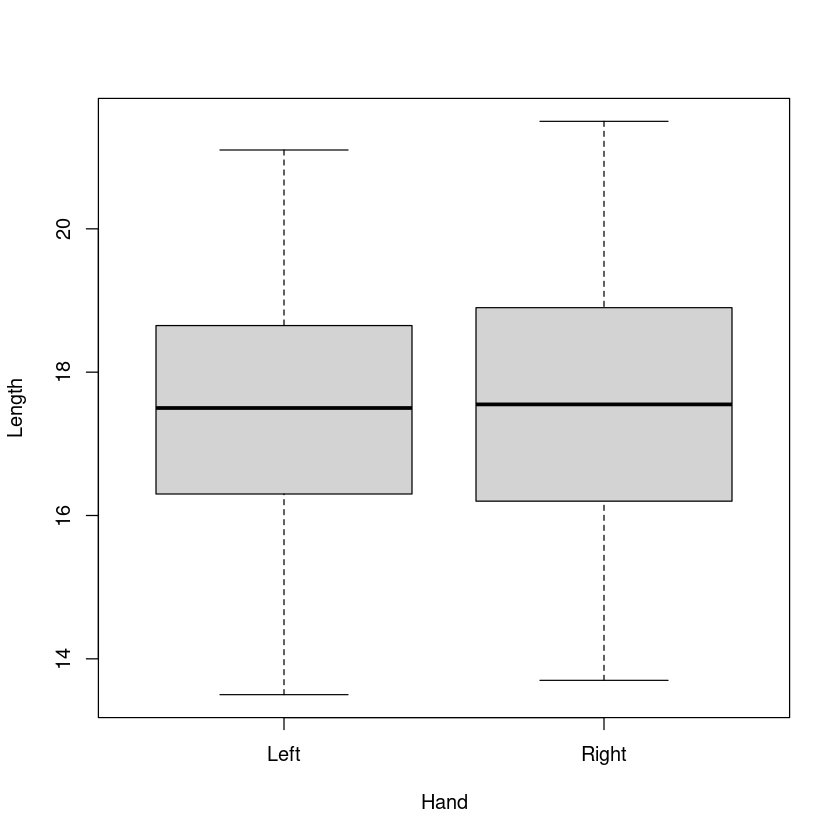

In [12]:
boxplot(Length ~ Hand, data = hand)

In [7]:
# 2 indepedent groups
independence_test(Length ~ Hand, data = hand)


	Asymptotic General Independence Test

data:  Length by Hand (Left, Right)
Z = -0.34768, p-value = 0.7281
alternative hypothesis: two.sided


**conclusion**: p value > 0.05, so we fail to reject $H_0$, concludes that we do not have strong evidence against the null hypothesis that there is no significant difference between the length of left hand and right hand

## 4.2 Permutation test of symmetry

This test treats the two groups (left hand and right hand) as having paired or repeated data, paired within Individual.  That is, the test looks at the difference between left hand and right hand for each individual.  The scatter plot above reflects the approach of this test.

In [9]:
head(hand)

Individual,Hand,Length
<chr>,<fct>,<dbl>
A,Left,17.5
B,Left,18.4
C,Left,16.2
D,Left,14.5
E,Left,13.5
F,Left,18.9


In [11]:
# match pair
symmetry_test(Length ~ Hand | Individual, data = hand)


	Asymptotic General Symmetry Test

data:  Length by
	 Hand (Left, Right) 
	 stratified by Individual
Z = -2.6348, p-value = 0.008418
alternative hypothesis: two.sided


**Conclusion**: p value < 0.01, reject $H_0$, concludes that **for a given person**, there is a statistically significant difference between the length of the left hand and the right hand

# 5. Interpretation

 The general interpretation for significant results of these models isn’t that there is a difference among medians, but that there is a significant effect of the independent variable on the dependent variable, or that there is a significant difference among groups.

# 6. Further Reading

- [R handbook: Permutation Test for median and percentiles](https://rcompanion.org/handbook/F_15.html)
- [R handbook: Permutation Test of Independence for ordinal data](https://rcompanion.org/handbook/K_02.html)
- [R handbook: Permutation Test of Symmetry for ordinal data](https://rcompanion.org/handbook/K_03.html)